# NBA all time stats

This project is based on data stored on site: https://www.kaggle.com/drgilermo/nba-players-stats.
We can find 3 .csv files there. Seasons_stats.csv contains stats from every NBA player each season since 1949/1950. Two other files contain some basic informations about each player such as: name, birthdate, height, etc.

Important note:
There is a lot of data that is missing, because not every stat is available since the first season.
More details and explaination of each stat: https://www.basketball-reference.com/about/glossary.html


## Import stats and get some basic info 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
stat = pd.read_csv('Seasons_Stats.csv')
pl1 = pd.read_csv('Players.csv')
pl2 = pd.read_csv('player_data.csv')

In [3]:
stat.shape

(24691, 53)

In [4]:
stat.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [5]:
stat.sample(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21101,21101,2011.0,Jason Williams,PG,35.0,MEM,11.0,0.0,124.0,8.2,...,NaN,0.0,8.0,8.0,28.0,3.0,1.0,7.0,2.0,21.0
6517,6517,1982.0,Geoff Crompton,C,26.0,MIL,35.0,1.0,203.0,3.6,...,0.400,10.0,31.0,41.0,13.0,6.0,12.0,17.0,39.0,28.0
6251,6251,1981.0,Reggie Johnson,PF,23.0,SAS,79.0,NaN,1716.0,12.9,...,0.663,132.0,226.0,358.0,78.0,45.0,48.0,130.0,283.0,808.0
14376,14376,1999.0,Casey Shaw,C,23.0,PHI,9.0,0.0,14.0,-14.9,...,NaN,3.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,2.0
24299,24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24228,24228,2017.0,Boris Diaw,PF,34.0,UTA,73.0,33.0,1283.0,9.0,...,0.743,46.0,112.0,158.0,170.0,18.0,9.0,87.0,83.0,338.0
22614,22614,2014.0,Cartier Martin,SF,29.0,ATL,53.0,6.0,822.0,10.9,...,0.754,12.0,93.0,105.0,31.0,26.0,7.0,33.0,68.0,314.0
15690,15690,2002.0,Tim Hardaway,PG,35.0,TOT,68.0,16.0,1601.0,13.6,...,0.794,14.0,110.0,124.0,278.0,57.0,10.0,111.0,109.0,652.0
8285,8285,1986.0,Ray Williams,PG,31.0,ATL,19.0,13.0,367.0,13.7,...,0.854,19.0,26.0,45.0,67.0,28.0,1.0,41.0,48.0,159.0
19044,19044,2008.0,Damon Jones,SG,31.0,CLE,67.0,3.0,1336.0,11.3,...,0.714,5.0,67.0,72.0,126.0,19.0,1.0,36.0,66.0,437.0


In [6]:
# show missing values
stat.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


## Cleaning

In [7]:
# Each column misses at least 67 values. 
# Those are season separators and do not contain any stats. Let's delete them
# stat = stat.drop(stat.loc[stat.PTS.isna()].index)
stat = stat.dropna(subset=['Player'])

In [8]:
# dropping blank columns
stat = stat.drop(['blanl', 'blank2'], axis=1)

In [9]:
stat.shape

(24624, 51)

In [10]:
stat.loc[stat.Age.isna()]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
733,733,1953.0,Mike O'Neill,SF,NaN,MLH,4.0,NaN,50.0,4.6,...,1.000,NaN,NaN,9.0,3.0,NaN,NaN,NaN,10.0,12.0
871,871,1954.0,Frank Reddout,F,NaN,ROC,7.0,NaN,18.0,42.5,...,0.750,NaN,NaN,9.0,0.0,NaN,NaN,NaN,6.0,13.0
971,971,1955.0,Ken McBride,SG,NaN,MLH,12.0,NaN,249.0,7.9,...,0.724,NaN,NaN,31.0,14.0,NaN,NaN,NaN,31.0,117.0
1028,1028,1956.0,Don Bielke,C,NaN,FTW,7.0,NaN,38.0,12.2,...,0.571,NaN,NaN,9.0,1.0,NaN,NaN,NaN,9.0,14.0
1104,1104,1956.0,Bob Schafer,SG,NaN,TOT,54.0,NaN,578.0,7.5,...,0.765,NaN,NaN,71.0,53.0,NaN,NaN,NaN,75.0,224.0
1105,1105,1956.0,Bob Schafer,SG,NaN,PHW,12.0,NaN,82.0,8.4,...,0.583,NaN,NaN,13.0,9.0,NaN,NaN,NaN,14.0,31.0
1106,1106,1956.0,Bob Schafer,SG,NaN,STL,42.0,NaN,496.0,7.4,...,0.797,NaN,NaN,58.0,44.0,NaN,NaN,NaN,61.0,193.0
1214,1214,1957.0,Bob Schafer,SG,NaN,SYR,11.0,NaN,167.0,5.2,...,0.846,NaN,NaN,11.0,15.0,NaN,NaN,NaN,16.0,49.0


In [11]:
pl1.shape

(3922, 8)

In [12]:
pl1.isna().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [13]:
# pl1 = pl1.drop(pl1.loc[pl1.Player.isna()].index)
pl1 = pl1.dropna(subset=['Player'])

In [14]:
pl1.shape

(3921, 8)

In [15]:
pl1.sample(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
2432,2432,Arvydas Sabonis*,221.0,126.0,NaN,1964.0,Kaunas,Lithuania
2448,2448,George Zidek,213.0,113.0,"University of California, Los Angeles",1973.0,Zlin,Czech Republic
3380,3380,Garrett Temple,198.0,88.0,Louisiana State University,1986.0,Baton Rouge,Louisiana
2557,2557,Marko Milic,198.0,106.0,NaN,1977.0,Kranj,Slovenia
1855,1855,Kannard Johnson,206.0,99.0,Western Kentucky University,1965.0,Cincinnati,Ohio
421,421,Gary Bergen,203.0,95.0,University of Utah,1932.0,Independence,Missouri
2161,2161,Billy Owens,203.0,99.0,Syracuse University,1969.0,Carlisle,Pennsylvania
2908,2908,Marcus Banks,188.0,90.0,"University of Nevada, Las Vegas",1981.0,Las Vegas,Nevada
3177,3177,Steve Novak,208.0,102.0,Marquette University,1983.0,Libertyville,Illinois
1307,1307,James Hardy,203.0,99.0,University of San Francisco,1956.0,Knoxville,Alabama


In [16]:
pl2.shape

(4550, 8)

In [17]:
pl2.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [18]:
pl1.isna().sum()

Unnamed: 0       0
Player           0
height           0
weight           0
collage        348
born             0
birth_city     469
birth_state    482
dtype: int64

In [19]:
len(pl1.Player.unique())

3921

In [20]:
pl2.isna().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [21]:
len(pl2.name.unique())

4500

In [22]:
pl1.Player.str.contains('\*').value_counts()

False    3794
True      127
Name: Player, dtype: int64

In [23]:
def delete_asterisk(text):
    if '*' in text:
        return text[:-1]
    else:
        return text

In [24]:
pl1['Player'] = pl1.Player.apply(delete_asterisk)

In [25]:
stat['Player'] = stat.Player.apply(delete_asterisk)

In [26]:
pl1.Player.isin(pl2.name).value_counts()

True     3892
False      29
Name: Player, dtype: int64

In [27]:
pl1.loc[~pl1.Player.isin(pl2.name)]

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
93,93,Wah Wah,180.0,77.0,NaN,1921.0,NaN,NaN
115,115,Johnny Macknowski,183.0,81.0,Seton Hall University,1923.0,NaN,NaN
209,209,Butch Van,183.0,77.0,NaN,1922.0,NaN,NaN
213,213,Whitey Von,193.0,92.0,NaN,1921.0,NaN,NaN
451,451,Hot Rod,193.0,83.0,NaN,1935.0,NaN,NaN
532,532,George Bon,185.0,79.0,NaN,1939.0,NaN,NaN
665,665,Dick Van,208.0,106.0,NaN,1940.0,NaN,NaN
666,666,Tom Van,208.0,106.0,NaN,1940.0,NaN,NaN
816,816,Norm Van,196.0,86.0,NaN,1939.0,NaN,NaN
819,819,Jo Jo,190.0,81.0,NaN,1947.0,NaN,NaN


In [28]:
pl2.name.isin(pl1.Player).value_counts()

True     3940
False     610
Name: name, dtype: int64

In [29]:
pl2.loc[~pl2.name.isin(pl1.Player), ['name', 'year_start']].sample(20)

,name,year_start
2696,Roy McPipe,1975
2516,Mike Maloy,1971
1296,De'Aaron Fox,2018
546,Larry Bunce,1968
184,Herschel Baltimore,1947
1333,Markelle Fultz,2018
23,Bam Adebayo,2018
4020,Sindarius Thornwell,2018
17,George Adams,1973
903,Aubrey Davis,1947


In [30]:
stat.loc[~stat.Player.isin(pl1.Player), 'Player']

Series([], Name: Player, dtype: object)

In [31]:
stat.Player.isin(pl1.Player).value_counts()

True    24624
Name: Player, dtype: int64

In [32]:
stat.loc[~stat.Player.isin(pl2.name)].sample(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5695,5695,1979.0,Norm Van,PG,31.0,MIL,38.0,NaN,555.0,11.0,...,0.904,8.0,32.0,40.0,158.0,43.0,3.0,49.0,108.0,107.0
8188,8188,1986.0,Micheal Ray,PG,30.0,NJN,47.0,39.0,1604.0,16.9,...,0.788,77.0,173.0,250.0,340.0,125.0,11.0,150.0,163.0,737.0
22416,22416,2014.0,Nando De,SF,26.0,SAS,26.0,3.0,301.0,13.2,...,0.818,6.0,39.0,45.0,32.0,15.0,3.0,21.0,25.0,112.0
22627,22627,2014.0,Luc Mbah,PF,27.0,MIN,55.0,2.0,807.0,7.5,...,0.685,47.0,72.0,119.0,21.0,21.0,9.0,36.0,50.0,184.0
11010,11010,1993.0,Vinny Del,PG,26.0,SAS,73.0,31.0,1526.0,13.9,...,0.863,19.0,144.0,163.0,291.0,44.0,1.0,92.0,146.0,543.0
22024,22024,2013.0,Luc Mbah,SF,26.0,MIL,58.0,45.0,1326.0,9.1,...,0.571,89.0,167.0,256.0,55.0,42.0,14.0,70.0,82.0,387.0
16440,16440,2003.0,Nick Van,SG,31.0,DAL,73.0,1.0,2026.0,15.6,...,0.764,35.0,173.0,208.0,312.0,42.0,4.0,123.0,86.0,912.0
5694,5694,1979.0,Jan Van,SF,27.0,NJN,80.0,NaN,1998.0,10.8,...,0.798,108.0,274.0,382.0,180.0,85.0,74.0,135.0,235.0,538.0
2640,2640,1968.0,Tom Van,SF,24.0,CIN,27.0,NaN,682.0,11.5,...,0.750,NaN,NaN,93.0,76.0,NaN,NaN,NaN,83.0,281.0
12405,12405,1996.0,Vinny Del,SG,29.0,SAS,82.0,82.0,2766.0,15.6,...,0.832,36.0,236.0,272.0,315.0,85.0,6.0,100.0,166.0,1191.0


In [33]:
stat.Player.isin(pl2.name).value_counts()

True     24390
False      234
Name: Player, dtype: int64

In [34]:
~stat.Player.isin(pl1.Player).value_counts()

True   -24625
Name: Player, dtype: int64

In [35]:
stat.Player.value_counts()

Eddie Johnson       33
Mike Dunleavy       32
Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
Joe Smith           26
George Johnson      26
James Edwards       25
Andre Miller        25
Juwan Howard        25
Jim Jackson         24
Tyrone Corbin       24
Reggie Williams     24
Theo Ratliff        24
Vince Carter        23
Jason Kidd          23
Drew Gooden         23
Chauncey Billups    23
Charles Smith       23
Rod Strickland      23
Kevin Garnett       23
Kevin Ollie         23
Charles Jones       23
Avery Johnson       22
Derek Fisher        22
Herb Williams       22
Danny Schayes       22
Kenny Anderson      22
Sam Cassell         22
John Lucas          22
                    ..
Casey Shaw           1
Andy Panko           1
Jim Burns            1
Edmund Lawrence      1
George Brown         1
Wayne Turner         1
Drew Gordon          1
Rob Rose             1
Jack Cotton          1
Mickey Dillard       1
Walt Gilmore         1
Travis Wear          1
Igor Rakoce

In [36]:
pl1.columns


Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')

### Merging player data frames

In [37]:
pl1 = pl1.rename(columns={'height': 'height_cm', 'weight': 'weight_kg'})

#### join

In [38]:
test1 = pl1.set_index('Player').join(pl2.set_index('name'))
test1.shape

(3973, 14)

In [39]:
test1.sample(10)

,Unnamed: 0,height_cm,weight_kg,collage,born,birth_city,birth_state,year_start,year_end,position,height,weight,birth_date,college
Brian Cook,2921,206.0,106.0,University of Illinois at Urbana-Champaign,1980.0,Lincoln,Illinois,2004.0,2012.0,F,6-9,234.0,"December 4, 1980",University of Illinois at Urbana-Champaign
D.C. Wilcutt,220,175.0,70.0,NaN,1926.0,NaN,NaN,1949.0,1950.0,G,6-2,165.0,"March 25, 1923",Saint Louis University
Sam Sibert,968,201.0,97.0,Kentucky State University,1949.0,NaN,NaN,1973.0,1973.0,F,6-7,215.0,"February 11, 1949",Kentucky State University
Horacio Llamas,2484,211.0,129.0,Grand Canyon University,1973.0,El Rosario,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kalin Lucas,3725,185.0,88.0,Michigan State University,1989.0,Sterling Heights,Michigan,2015.0,2015.0,G,6-1,195.0,"May 24, 1989",Michigan State University
Walter McCarty,2487,208.0,104.0,University of Kentucky,1974.0,Evansville,Indiana,1997.0,2006.0,F,6-10,230.0,"February 1, 1974",University of Kentucky
Norm Cook,1137,203.0,95.0,University of Kansas,1955.0,Chicago,Illinois,1977.0,1978.0,F,6-8,210.0,"March 21, 1955",University of Kansas
Scott English,942,198.0,92.0,University of Texas at El Paso,1950.0,Evanston,Illinois,1973.0,1975.0,F,6-6,205.0,"October 20, 1950",University of Texas at El Paso
Fred Christ,357,193.0,95.0,Fordham University,1930.0,NaN,NaN,1955.0,1955.0,G,6-4,210.0,"August 6, 1930",Fordham University
Darren Morningstar,2296,208.0,106.0,University of Pittsburgh,1969.0,Stevenson,Washington,1994.0,1994.0,C,6-10,235.0,"April 22, 1969",University of Pittsburgh


In [40]:
test1 = test1.drop(['collage', 'born'], axis=1)
test1

,Unnamed: 0,height_cm,weight_kg,birth_city,birth_state,year_start,year_end,position,height,weight,birth_date,college
A.C. Green,1723,203.0,106.0,NaN,NaN,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
A.J. Bramlett,2657,196.0,88.0,NaN,NaN,2000.0,2000.0,C,6-10,227.0,"January 10, 1977",University of Arizona
A.J. English,2068,196.0,95.0,NaN,NaN,1991.0,1992.0,G,6-3,175.0,"July 11, 1967",Virginia Union University
A.J. Guyton,2724,208.0,99.0,NaN,NaN,2001.0,2003.0,G,6-1,180.0,"February 12, 1978",Indiana University
A.J. Hammons,3863,198.0,99.0,NaN,NaN,2017.0,2017.0,C,7-0,260.0,"August 27, 1992",Purdue University
A.J. Price,3376,213.0,124.0,NaN,NaN,2010.0,2015.0,G,6-2,181.0,"October 7, 1986",University of Connecticut
A.J. Wynder,2119,190.0,83.0,NaN,NaN,1991.0,1991.0,G,6-2,180.0,"September 11, 1964",Fairfield University
A.W. Holt,843,206.0,86.0,NaN,NaN,1971.0,1971.0,F,6-7,210.0,"August 26, 1946",Jackson State University
Aaron Brooks,3211,183.0,73.0,Seattle,Washington,2008.0,2018.0,G,6-0,161.0,"January 14, 1985",University of Oregon
Aaron Gordon,3707,206.0,99.0,San Jose,California,2015.0,2018.0,F,6-9,220.0,"September 16, 1995",University of Arizona


#### Merge 1

In [41]:
test2 = pl1.merge(pl2, left_on='Player', right_on='name')
type(test2)

pandas.core.frame.DataFrame

In [42]:
# test2 = test2.drop([ 'name'], axis=1)
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]
test2

,Player,height_cm,weight_kg,collage,born,birth_city,birth_state,name,year_start,year_end,position,height,weight,birth_date,college
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,Curly Armstrong,1949,1951,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,Cliff Barker,1950,1952,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,Leo Barnhorst,1950,1954,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,Ed Bartels,1950,1951,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,Ralph Beard,1950,1951,G,5-10,175.0,"December 2, 1927",University of Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN,Gene Berce,1950,1950,G-F,5-11,175.0,"November 22, 1926",Marquette University
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho,Charlie Black,1949,1952,F-C,6-5,200.0,"June 15, 1921",University of Kansas
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania,Nelson Bobb,1950,1953,G,6-0,170.0,"February 25, 1924",Temple University
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey,Jake Bornheimer,1949,1950,F-C,6-5,200.0,"June 29, 1927",Muhlenberg College
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana,Vince Boryla,1950,1954,F,6-5,210.0,"March 11, 1927",University of Denver


In [43]:
test2.shape

(3944, 15)

In [44]:
pl1.shape

(3921, 8)

#### Merge 2

In [45]:
test3 = pl2.merge(pl1, left_on='name', right_on='Player')

In [46]:
test3.shape

(3944, 16)

In [47]:
test3 = test3.drop(['collage', 'born', 'name'], axis=1)
test3

,year_start,year_end,position,height,weight,birth_date,college,Unnamed: 0,Player,height_cm,weight_kg,birth_city,birth_state
0,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,2047,Alaa Abdelnaby,208.0,108.0,Cairo,Egypt
1,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,746,Zaid Abdul-Aziz,206.0,106.0,Brooklyn,New York
2,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",789,Kareem Abdul-Jabbar,218.0,102.0,New York,New York
3,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,2048,Mahmoud Abdul-Rauf,188.0,83.0,Wilmington,Delaware
4,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,2518,Tariq Abdul-Wahad,198.0,101.0,Maisons Alfort,France
5,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,2449,Shareef Abdur-Rahim,206.0,102.0,Marietta,Georgia
6,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,1121,Tom Abernethy,201.0,99.0,South Bend,Indiana
7,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,418,Forest Able,190.0,81.0,NaN,NaN
8,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN,3833,Alex Abrines,198.0,86.0,Palma de Mallorca,Spain
9,2006,2009,G,6-5,185.0,"January 21, 1983",Pepperdine University,3042,Alex Acker,196.0,83.0,Compton,California


In [48]:
stat.Player.isin(pl1.Player).value_counts()

True    24624
Name: Player, dtype: int64

In [49]:
test3.Player.isin(stat.Player).value_counts()

True    3944
Name: Player, dtype: int64

## Import the list of all time international players

Source: https://en.wikipedia.org/wiki/List_of_foreign_NBA_players

In [50]:
intp = pd.read_csv('international.csv')

In [51]:
intp.shape

(698, 8)

In [52]:
intp.dtypes

Nationality[A]      object
Birthplace[B]       object
Player              object
Pos.                object
Career[C]           object
Yrs                float64
Notes               object
Ref.                object
dtype: object

In [53]:
intp.sample(10)

,Nationality[A],Birthplace[B],Player,Pos.,Career[C],Yrs,Notes,Ref.
285,Great Britain,—,OG Anunoby*,F,2017–present,2.0,Born in England to Nigerian parents.[297],[298]
330,Iran,—,Hamed Haddadi,C,2008–2013,5.0,—,[339]
683,United States,West Germany,Kiki Vandeweghe,F,1980–1993,13.0,Born in West Germany[G] to a Canadian father a...,[669]
11,Argentina,—,Juan Ignacio Sánchez,G,2000–2001; 2002–2003,2.0,—,[21]
382,Lithuania,Soviet Union,Šarūnas Jasikevičius,G,2005–2007,2.0,"Born in the Soviet Union,[F] represented Lithu...",[395]
284,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Canada,Denmark,Lars Hansen,C,1978–1979,1.0,"Born in Denmark, grew up in Canada, became a n...",[124]
75,Brazil,—,Fab Melo,C,2012–2013,1.0,—,[86]
201,Dominican Republic,—,Felipe López,G,1998–2002,4.0,—,[208]
517,Serbia,SFR Yugoslavia,Nemanja Bjelica*,F,2015–present,4.0,"Born in SFR Yugoslavia,[D] represents Serbia i...",[523]


### Cleaning

In [54]:
# renaming columns
intp.columns = ['nationality', 'birthplace', 'Player', 'Pos', 'Career', 'years', 'Notes', 'Ref']

In [55]:
intp = intp.dropna(subset=['Player', 'nationality'])

In [56]:
intp = intp.drop(['Notes', 'Ref'], axis=1)

In [57]:
# drop players with US Nationality
intp = intp.loc[intp.nationality != ' United States ']

In [58]:
intp.shape

(506, 6)

In [59]:
intp.index = pd.RangeIndex(len(intp))

In [60]:
intp.sample(10)

,nationality,birthplace,Player,Pos,Career,years
38,Austria,—,Jakob Pöltl*,C,2016–present,3.0
163,Dominican Republic,—,Al Horford*,C,2007–present,12.0
245,Greece,—,Thanasis Antetokounmpo,F,2016,1.0
224,Germany,West Germany,Detlef Schrempf,F/C,1985–2001,16.0
440,Slovenia,SFR Yugoslavia,Zoran Dragić,G,2014–2015,1.0
70,Brazil,—,João Vianna,F,1991,1.0
118,Canada,—,Jim Zoet,C,1982,1.0
45,Belgium,Zaire,Didier Mbenga,C,2004–2011,7.0
133,Croatia,SFR Yugoslavia,Mario Kasun,C,2004–2006,2.0
197,France,French Guiana,Kevin Seraphin,F,2010–2017,7.0


In [61]:
def clean_name(input):
    if input.endswith(' '):
        if '*' in input:
            return input[:-2]
        elif '^' in input:
            return input[:-2]
        else:
            return input[:-1]
        
    else:
        return input

In [62]:
intp['Player'] = intp.Player.apply(clean_name)

In [63]:
intp.Player.isin(pl1.Player).value_counts()

True     316
False    190
Name: Player, dtype: int64

In [64]:
intp.loc[~intp.Player.isin(pl1.Player)].head(10)

,nationality,birthplace,Player,Pos,Career,years
1,Argentina,—,Nicolás Brussino,G/F,2016–2017,2.0
4,Argentina,—,Manu Ginóbili,G,2002–2018,16.0
6,Argentina,—,Nicolás Laprovíttola,G,2016,1.0
7,Argentina,—,Andrés Nocioni,F,2004–2012,8.0
10,Argentina,—,Juan Ignacio Sánchez,G,2000–2001; 2002–2003,2.0
12,Argentina,—,Rubén Wolkowyski,F,2000–2001; 2002–2003,2.0
13,Australia,Sudan,Deng Adel,F,2019–present,1.0
19,Australia,—,Jonah Bolden,F,2018–present,1.0
21,Australia,—,Ryan Broekhoff,G,2018–present,1.0
22,Australia,—,Mitch Creek,G,2019–present,1.0


### Unidecoding international letters

In [65]:
from unidecode import unidecode

def replace_special_letters(text):
    return unidecode(text)
    

In [66]:
# intp = intp.replace({'Player': {'ö': 'oe'}}, regex=True)
intp['Player'] = intp.Player.apply(replace_special_letters)
intp.Player.isin(pl1.Player).value_counts()

True     426
False     80
Name: Player, dtype: int64

In [67]:
intp.loc[~intp.Player.isin(pl1.Player)].sample(20)

,nationality,birthplace,Player,Pos,Career,years
371,Puerto Rico,United States,Tyler Davis,C,2018,1.0
13,Australia,Sudan,Deng Adel,F,2019–present,1.0
179,France,—,Nando de Colo,G,2012–2014,2.0
84,Canada,Kingdom of Italy,Hank Biasatti,G,1946,1.0
410,Serbia,FR Yugoslavia,Bogdan Bogdanovic,G,2017–present,2.0
171,Finland,—,Lauri Markkanen,F/C,2017–present,2.0
443,Slovenia,SFR Yugoslavia,Radoslav Nesterovic,C,1998–2010,12.0
165,Dominican Republic,—,Luis David Montero,G,2015–2016;,2.0
50,Bosnia and Herzegovina,—,Dzanan Musa,F,2018–present,1.0
191,France,Belgium,Frank Ntilikina,G,2017–present,2.0


In [68]:
intp.loc[intp.Player == 'Nene *', 'Player'] = 'Nene Hilario'
intp.loc[intp.Player == 'Radoslav Nesterovic', 'Player'] = 'Rasho Nesterovic'
intp.loc[intp.Player == 'Jose Juan Barea', 'Player'] = 'J.J. Barea'
intp.loc[intp.Player == 'Didier Mbenga', 'Player'] = 'Didier Ilunga-Mbenga'
intp.loc[intp.Player == 'Slava Medvedenko', 'Player'] = 'Stanislav Medvedenko'
intp.loc[intp.Player == 'Jakob Poltl', 'Player'] = 'Jakob Poeltl'
intp.loc[intp.Player == 'Victor Khryapa', 'Player'] = 'Viktor Khryapa'
intp.loc[intp.Player == 'Dino Rada', 'Player'] = 'Dino Radja'

In [69]:
# intp.loc[intp.Player == 'Nene *']

In [103]:
intp.loc[~intp.Player.isin(pl2.name)].sample(20)

,nationality,birthplace,Player,Pos,Career,years
244,Greece,—,Kostas Antetokounmpo,F,2018–present,1.0
297,Libya,United States,Hesham Salem,F,2004,1.0
91,Canada,—,Shai Gilgeous-Alexander,G,2018–present,1.0
49,Bosnia and Herzegovina,United States,J. R. Bremer,G,2002–2004,2.0
227,Germany,—,Moritz Wagner,F/C,2018–present,1.0
438,Slovenia,—,Luka Doncic,G/F,2018–present,1.0
413,Serbia,SFR Yugoslavia,Predrag Danilovic,G,1995–1997,2.0
290,Japan,—,Yuta Watanabe,F,2018–present,1.0
50,Bosnia and Herzegovina,—,Dzanan Musa,F,2018–present,1.0
179,France,—,Nando de Colo,G,2012–2014,2.0


In [71]:
intp.shape

(506, 6)

### Total points in NBA by season

In [72]:
stat.PTS.groupby(stat.Year).sum()

Year
1950.0    103562.0
1951.0     65338.0
1952.0     58096.0
1953.0     64356.0
1954.0     55252.0
1955.0     55253.0
1956.0     59768.0
1957.0     59654.0
1958.0     63093.0
1959.0     67031.0
1960.0     73427.0
1961.0     76346.0
1962.0     88652.0
1963.0     87134.0
1964.0     87252.0
1965.0     84805.0
1966.0     91383.0
1967.0     97816.0
1968.0    123590.0
1969.0    142713.0
1970.0    143260.0
1971.0    161457.0
1972.0    168154.0
1973.0    162656.0
1974.0    153024.0
1975.0    162534.0
1976.0    161247.0
1977.0    209113.0
1978.0    219911.0
1979.0    216059.0
            ...   
1988.0    225265.0
1989.0    241046.0
1990.0    251070.0
1991.0    249742.0
1992.0    240576.0
1993.0    239967.0
1994.0    239508.0
1995.0    235269.0
1996.0    260126.0
1997.0    250743.0
1998.0    250326.0
1999.0    140408.0
2000.0    240401.0
2001.0    241954.0
2002.0    241363.0
2003.0    238771.0
2004.0    250671.0
2005.0    264712.0
2006.0    257976.0
2007.0    256409.0
2008.0    267460.0
2009.0 

In [73]:
stati = stat.loc[stat.Player.isin(intp.Player)]
stati.shape

(2284, 51)

I wanted to see the guys with most points in a single season and for some reason I tried
to do it with groupby...

In [74]:
stati[['Year', 'Player', 'PTS']].sort_values(by='PTS').tail(10)

,Year,Player,PTS
24115,2017.0,Giannis Antetokounmpo,1832.0
18569,2007.0,Dirk Nowitzki,1916.0
24658,2017.0,Andrew Wiggins,1933.0
16974,2004.0,Peja Stojakovic,1964.0
16322,2003.0,Dirk Nowitzki,2011.0
20329,2010.0,Dirk Nowitzki,2027.0
17460,2005.0,Dirk Nowitzki,2032.0
24625,2017.0,Karl-Anthony Towns,2061.0
19734,2009.0,Dirk Nowitzki,2094.0
18028,2006.0,Dirk Nowitzki,2151.0


In [75]:
stat[['Year', 'Player', 'PTS']].sort_values(by='PTS').tail(10)

,Year,Player,PTS
2355,1967.0,Rick Barry,2775.0
3316,1972.0,Kareem Abdul-Jabbar,2822.0
4255,1975.0,Bob McAdoo,2831.0
17742,2006.0,Kobe Bryant,2832.0
8869,1988.0,Michael Jordan,2868.0
1962,1964.0,Wilt Chamberlain,2948.0
1593,1961.0,Wilt Chamberlain,3033.0
8469,1987.0,Michael Jordan,3041.0
1827,1963.0,Wilt Chamberlain,3586.0
1706,1962.0,Wilt Chamberlain,4029.0


In [76]:
stati[['Year', 'Player', 'BLK']].sort_values(by='BLK', na_position='first').tail(10)

,Year,Player,BLK
11883,1995.0,Shawn Bradley,274.0
13734,1998.0,Dikembe Mutombo,277.0
11179,1993.0,Dikembe Mutombo,287.0
12337,1996.0,Shawn Bradley,288.0
8329,1987.0,Manute Bol,302.0
12130,1995.0,Dikembe Mutombo,321.0
12625,1996.0,Dikembe Mutombo,332.0
11677,1994.0,Dikembe Mutombo,336.0
9143,1989.0,Manute Bol,345.0
7944,1986.0,Manute Bol,397.0


In [77]:
new_df = stati[['Year', 'Player', 'PTS']].sort_values(by='PTS', na_position='first').tail(10)
new_df

,Year,Player,PTS
24115,2017.0,Giannis Antetokounmpo,1832.0
18569,2007.0,Dirk Nowitzki,1916.0
24658,2017.0,Andrew Wiggins,1933.0
16974,2004.0,Peja Stojakovic,1964.0
16322,2003.0,Dirk Nowitzki,2011.0
20329,2010.0,Dirk Nowitzki,2027.0
17460,2005.0,Dirk Nowitzki,2032.0
24625,2017.0,Karl-Anthony Towns,2061.0
19734,2009.0,Dirk Nowitzki,2094.0
18028,2006.0,Dirk Nowitzki,2151.0


Trying to combine 2 columns with different types

In [78]:
new_df[['Year', 'Player']].apply(lambda x: ''.join(str(x)), axis=1)

24115    Year                       2017\nPlayer    Gia...
18569    Year               2007\nPlayer    Dirk Nowitz...
24658    Year                2017\nPlayer    Andrew Wig...
16974    Year                 2004\nPlayer    Peja Stoj...
16322    Year               2003\nPlayer    Dirk Nowitz...
20329    Year               2010\nPlayer    Dirk Nowitz...
17460    Year               2005\nPlayer    Dirk Nowitz...
24625    Year                    2017\nPlayer    Karl-A...
19734    Year               2009\nPlayer    Dirk Nowitz...
18028    Year               2006\nPlayer    Dirk Nowitz...
dtype: object

The solution

In [79]:
new_df['both'] = new_df["Year"].map(str) + " " + new_df["Player"]
new_df

,Year,Player,PTS,both
24115,2017.0,Giannis Antetokounmpo,1832.0,2017.0 Giannis Antetokounmpo
18569,2007.0,Dirk Nowitzki,1916.0,2007.0 Dirk Nowitzki
24658,2017.0,Andrew Wiggins,1933.0,2017.0 Andrew Wiggins
16974,2004.0,Peja Stojakovic,1964.0,2004.0 Peja Stojakovic
16322,2003.0,Dirk Nowitzki,2011.0,2003.0 Dirk Nowitzki
20329,2010.0,Dirk Nowitzki,2027.0,2010.0 Dirk Nowitzki
17460,2005.0,Dirk Nowitzki,2032.0,2005.0 Dirk Nowitzki
24625,2017.0,Karl-Anthony Towns,2061.0,2017.0 Karl-Anthony Towns
19734,2009.0,Dirk Nowitzki,2094.0,2009.0 Dirk Nowitzki
18028,2006.0,Dirk Nowitzki,2151.0,2006.0 Dirk Nowitzki


I have struggled here to display both on x axis

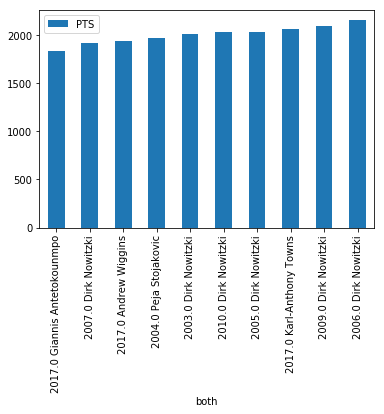

In [80]:
new_df.plot(kind='bar', x='both', y='PTS')

### Total points in NBA by year

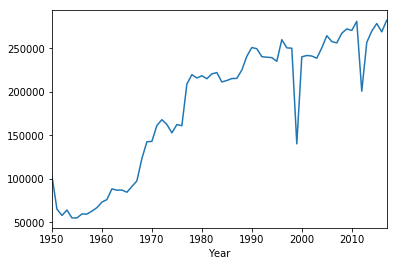

In [81]:
stat.PTS.groupby(stat.Year).sum().plot()

### Total points in NBA by year from international players

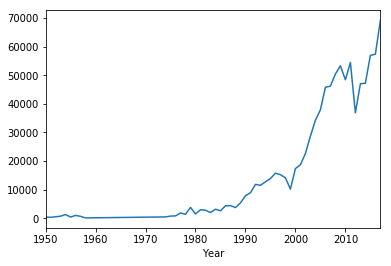

In [82]:
stati.PTS.groupby(stat.Year).sum().plot()

In [83]:
stat.PTS.groupby(stat.Year).sum().shape

(68,)

In [84]:
stati.PTS.groupby(stat.Year).sum().shape

(53,)

In [85]:
stati.PTS.groupby(stat.Year).sum()

Year
1950.0      421.0
1951.0      338.0
1952.0      524.0
1953.0      731.0
1954.0     1315.0
1955.0      425.0
1956.0     1001.0
1957.0      673.0
1958.0      128.0
1974.0      476.0
1975.0      766.0
1976.0      833.0
1977.0     1854.0
1978.0     1398.0
1979.0     3810.0
1980.0     1524.0
1981.0     2982.0
1982.0     2819.0
1983.0     2005.0
1984.0     3161.0
1985.0     2603.0
1986.0     4372.0
1987.0     4428.0
1988.0     3745.0
1989.0     5380.0
1990.0     7874.0
1991.0     8934.0
1992.0    11854.0
1993.0    11518.0
1994.0    12768.0
1995.0    13895.0
1996.0    15784.0
1997.0    15261.0
1998.0    14140.0
1999.0    10182.0
2000.0    17374.0
2001.0    18721.0
2002.0    22645.0
2003.0    28750.0
2004.0    34283.0
2005.0    37945.0
2006.0    45821.0
2007.0    46205.0
2008.0    50444.0
2009.0    53317.0
2010.0    48428.0
2011.0    54485.0
2012.0    36874.0
2013.0    47026.0
2014.0    47222.0
2015.0    56958.0
2016.0    57383.0
2017.0    69247.0
Name: PTS, dtype: float64

### Number of non US players each year

In [86]:
stati.Player.groupby(stati.Year).count()

Year
1950.0      1
1951.0      1
1952.0      1
1953.0      1
1954.0      4
1955.0      1
1956.0      5
1957.0      1
1958.0      1
1974.0      2
1975.0      2
1976.0      2
1977.0      3
1978.0      2
1979.0      7
1980.0      5
1981.0      3
1982.0      5
1983.0      4
1984.0      6
1985.0      7
1986.0     18
1987.0     13
1988.0     11
1989.0     17
1990.0     24
1991.0     24
1992.0     23
1993.0     20
1994.0     35
1995.0     29
1996.0     30
1997.0     37
1998.0     32
1999.0     41
2000.0     46
2001.0     61
2002.0     58
2003.0     67
2004.0     91
2005.0    107
2006.0    114
2007.0    104
2008.0    115
2009.0    117
2010.0    110
2011.0    143
2012.0    110
2013.0    110
2014.0    117
2015.0    133
2016.0    112
2017.0    151
Name: Player, dtype: int64

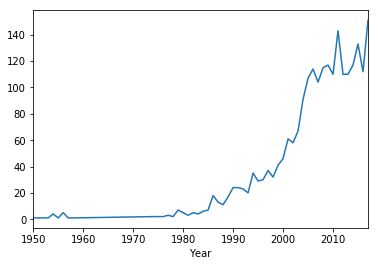

In [87]:
stati.Player.groupby(stati.Year).count().plot()

### Drop stats before 1974

In [88]:
stat_74 = stat.loc[stat.Year >= 1974]

In [89]:
stat_74.PTS.groupby(stat_74.Year).sum().shape

(44,)

In [90]:
stati_74 = stati.loc[stati.Year >= 1974]

In [91]:
stati_74.PTS.groupby(stati_74.Year).sum().shape

(44,)

### Average points per player

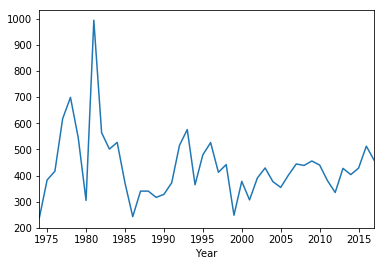

In [92]:
stati_74.PTS.groupby(stati_74.Year).mean().plot()

### PPG

International

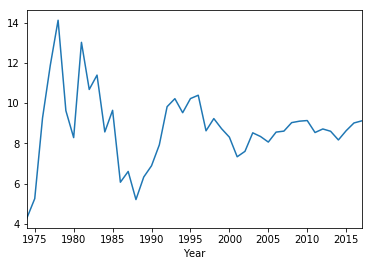

In [93]:
(stati_74.PTS.groupby(stati_74.Year).sum() / stati_74.G.groupby(stati_74.Year).sum()).plot()

USA

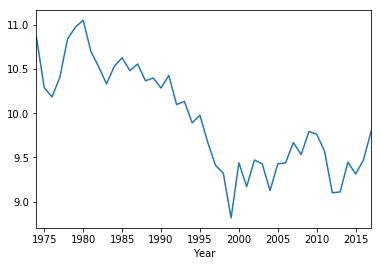

In [94]:
(stat_74.PTS.groupby(stat_74.Year).sum() / stat_74.G.groupby(stat_74.Year).sum()).plot()

Text(0, 0.5, 'Points per Game')

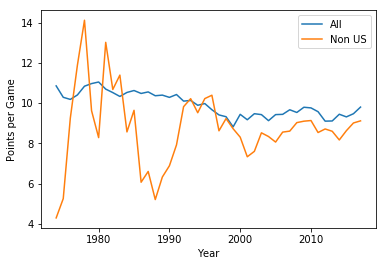

In [95]:
plt.plot(stat_74.PTS.groupby(stat_74.Year).sum() / stat_74.G.groupby(stat_74.Year).sum())
plt.plot(stati_74.PTS.groupby(stati_74.Year).sum() / stati_74.G.groupby(stati_74.Year).sum())
plt.legend(['All', 'Non US'])
plt.xlabel('Year')
plt.ylabel('Points per Game')

In [96]:
(stati_74.PTS.groupby(stati_74.Year).sum() / stati_74.G.groupby(stati_74.Year).sum())

Year
1974.0     4.288288
1975.0     5.246575
1976.0     9.255556
1977.0    11.884615
1978.0    14.121212
1979.0     9.621212
1980.0     8.282609
1981.0    13.021834
1982.0    10.678030
1983.0    11.392045
1984.0     8.566396
1985.0     9.640741
1986.0     6.063800
1987.0     6.599106
1988.0     5.201389
1989.0     6.321974
1990.0     6.882867
1991.0     7.920213
1992.0     9.821044
1993.0    10.220053
1994.0     9.521253
1995.0    10.224430
1996.0    10.391047
1997.0     8.622034
1998.0     9.229765
1999.0     8.724936
2000.0     8.304971
2001.0     7.330070
2002.0     7.598993
2003.0     8.521043
2004.0     8.337305
2005.0     8.061398
2006.0     8.556676
2007.0     8.605886
2008.0     9.028817
2009.0     9.100017
2010.0     9.132189
2011.0     8.535955
2012.0     8.713138
2013.0     8.598647
2014.0     8.167070
2015.0     8.627386
2016.0     9.011149
2017.0     9.116245
dtype: float64

### Percentage of total points in NBA

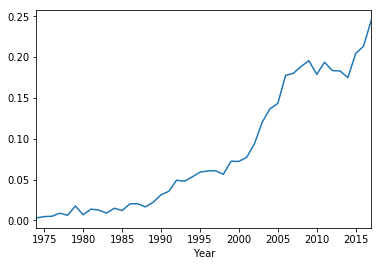

In [97]:
(stati_74.PTS.groupby(stat.Year).sum() / stat_74.PTS.groupby(stat.Year).sum()).plot()

### Percentage of total Players in NBA

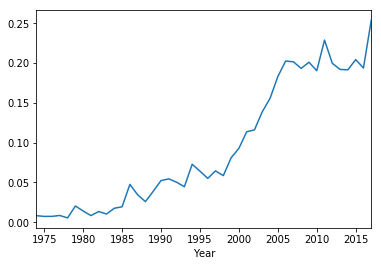

In [98]:
(stati_74.Player.groupby(stat.Year).count() / stat_74.Player.groupby(stat.Year).count()).plot()